<a href="https://colab.research.google.com/github/Dimisz/tensorflow_lectures/blob/main/GANs_lecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GANs Brief Theory

## Broad Overview

GANs may be thought of as two neural networks competing with each other to create new data

**Generator**:
* Receives random noise (Gaussian/ normal distribution)
* Outputs data (often an image)

**Discriminator**:
* Takes a dataset consisting of real images and fake images from the generator.
* Attempts to classiify real vs fake (always binary classification)

## Difficulties

* Training Resources
* Mode Collapse
* Instability

### Training resources

Since GANs are most often used for image based data, they require GPUs for reasonable training time


### Mode Collapse

Often the generator will figure out a few images (or a single imaage) that can fool the discriminator, and eventually 'collapses' to only produce that image

#### Solutions to Mode Collapse

* **DCGANs (Deep Convolutional GANs** are better for avoiding mode collapse.

* Researchers are also experimenting with **`mini-batch discrimination`**, punishing generated batches of images that are all too similar.

### Instability

It can be difficult to ascertain performance and appropriate training epochs since the generated images are always truly 'fake'

# Practical Part

## Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


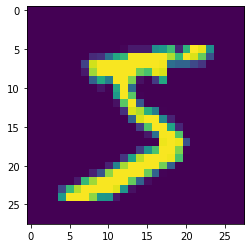

In [5]:
plt.imshow(X_train[0])

In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
only_zeros = X_train[y_train == 0]

In [8]:
only_zeros.shape

(5923, 28, 28)

In [9]:
X_train.shape

(60000, 28, 28)

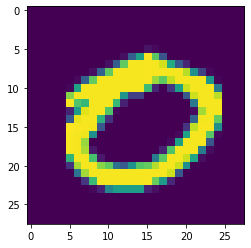

In [11]:
plt.imshow(only_zeros[14])

## Creating Generator and Discriminator

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, Flatten

import tensorflow as tf

In [13]:
discriminator = Sequential()
discriminator.add(Flatten(input_shape=[28,28]))
discriminator.add(Dense(150, activation="relu"))
discriminator.add(Dense(100, activation="relu"))
#Final output layer
discriminator.add(Dense(1, activation='sigmoid'))

discriminator.compile(loss='binary_crossentropy', optimizer='adam')

In [15]:
# no right coding_size
# should be less than the total number of features
# but not so little the model cannnot learn from it
coding_size = 100 # initial size=784

generator = Sequential()
generator.add(Dense(100, activation="relu", input_shape=[coding_size]))
generator.add(Dense(150, activation="relu"))
generator.add(Dense(784, activation="relu"))
generator.add(Reshape([28,28]))

In [16]:
GAN = Sequential([generator, discriminator])

In [17]:
discriminator.trainable = False

In [18]:
GAN.compile(loss='binary_crossentropy', optimizer='adam')

## Training the model

In [19]:
batch_size = 32

In [20]:
# my_data = X_train
my_data = only_zeros

In [21]:
dataset = tf.data.Dataset.from_tensor_slices(my_data).shuffle(buffer_size=1000)

In [22]:
type(dataset)

tensorflow.python.data.ops.dataset_ops.ShuffleDataset

In [23]:
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

In [24]:
epochs=1

In [25]:
GAN.layers[0].layers

In [26]:
GAN.layers[1].layers

In [29]:
generator, discriminator = GAN.layers

for epoch in range(epochs):
  print(f"Currrently on epoch: {epoch+1}")
  i = 0

  for X_batch in dataset:
    i = i+1
    if i%100 == 0:
      print(f"Currently on batch number: {i} of {len(my_data)//batch_size}")
    
    # Discriminator training phase
    noise = tf.random.normal(shape=[batch_size, coding_size])

    gen_images = generator(noise)

    X_fake_vs_real = tf.concat([gen_images, tf.dtypes.cast(X_batch, tf.float32)], axis=0)

    y1 = tf.constant([[0.0]]*batch_size + [[1.0]]*batch_size)

    discriminator.trainable = True

    discriminator.train_on_batch(X_fake_vs_real, y1)

    #Training generator
    noise = tf.random.normal(shape=[batch_size, coding_size])
    y2 = tf.constant([[1.0]]*batch_size)
    discriminator.trainable = False
    GAN.train_on_batch(noise,y2)

Currrently on epoch: 1
Currently on batch number: 100 of 185


In [30]:
noise = tf.random.normal(shape=[10, coding_size])

In [31]:
noise.shape

TensorShape([10, 100])

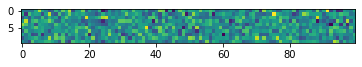

In [32]:
plt.imshow(noise)

In [33]:
images = generator(noise)

In [34]:
images.shape

TensorShape([10, 28, 28])

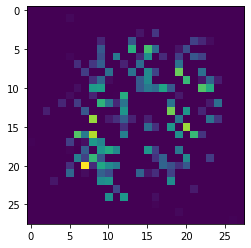

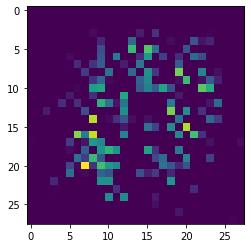

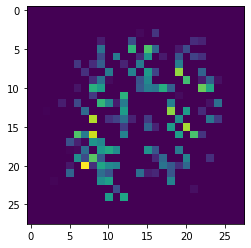

In [40]:
plt.imshow(images[1])
plt.show()
plt.imshow(images[0])
plt.show()
plt.imshow(images[5])
plt.show()

In [41]:
# It's mode collapse since all the images look similar